### Overlaying published DC2 subclusters

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

## I need to re-do previous analysis (2025-05-05_DC2-clusters-overlay.jpynb) and instead of just re-doing clustering I need to subset out DC2 first and then re-do on raw object from hvg onwards:

``` bash
rsync -azvhp /QRISdata/Q5935/nikita/scdata/Python_Objects_Backup_20250105/Python_Integration_Sep/NR_cleandata.h5ad /scratch/user/s4436039/scdata/Myeloid_Objects/ 

In [9]:
# read in data
data_labels = sc.read_h5ad('NRclean_clustered2_DC.h5ad')
data_clean_prehvg = sc.read_h5ad('NR_cleandata.h5ad')

In [10]:
data_labels

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

In [11]:
data_clean_prehvg
#check size same

AnnData object with n_obs × n_vars = 498382 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [12]:
#subset data_clean_prehvg to only the cells in data_labels based on barcode

# Get the list of barcodes (cell names) in data_labels
barcodes_to_keep = data_labels.obs.index

# subset data_clean_prehvg to just those in data_labels
data_clean_prehvg2 = data_clean_prehvg[data_clean_prehvg.obs.index.isin(barcodes_to_keep), :]

data_clean_prehvg2

View of AnnData object with n_obs × n_vars = 30241 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [13]:
# transfer metadata from final atlas (data_labels) to clean data pre-hvg

#define columns to transfer
meta_columns = ['Technology','NR_annotations_simple','sample_type_major2','cancer_with_H','cancer_broadest','patient_treatment']

# Subset the metadata in data_labels to match data_clean_prehvg2's barcodes
metadata_to_transfer = data_labels.obs.loc[data_clean_prehvg2.obs.index, meta_columns]

# Add these columns to data_clean_prehvg2's obs
for col in meta_columns:
    data_clean_prehvg2.obs[col] = metadata_to_transfer[col]

# Verify that the metadata was transferred
data_clean_prehvg2.obs.tail()

/scratch/temp/14332124/ipykernel_3079504/3961592118.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,site,sample_type_major,cancer_subtype,...,leiden_DC,leiden_DC_v2,exclude_annots,leiden_M,Technology,NR_annotations_simple,sample_type_major2,cancer_with_H,cancer_broadest,patient_treatment
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_GTTTACTCAAGGCCTC,-9.995153,-8.131683,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2694.0,ovary,primary tumour,HGSOC,...,4,1,NA,NaN,10x3',cDC1,primary tumour,HGSOC,HGSOC,Treatment naive
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TACCGAACAAACCGGA,-9.134331,-8.627023,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,839.0,ovary,primary tumour,HGSOC,...,2,4,NA,NaN,10x3',cDC2,primary tumour,HGSOC,HGSOC,Treatment naive
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TCACGCTTCCGTCACT,-10.033317,-7.518040,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,1683.0,ovary,primary tumour,HGSOC,...,3,2,NA,NaN,10x3',mregDC,primary tumour,HGSOC,HGSOC,Treatment naive
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGCAGTAGTGTTGCCG,-9.364501,-8.566583,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,2257.0,ovary,primary tumour,HGSOC,...,5,15,NA,NaN,10x3',cDC2,primary tumour,HGSOC,HGSOC,Treatment naive
GSE180661_HGSOC_SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY_TGTGAGTTCGGAAACG,-9.738727,-7.459797,Adnexa,HGSOC,Left Adnexa,SPECTRUM-OV-045_S1_CD45P_LEFT_OVARY,949.0,ovary,primary tumour,HGSOC,...,3,2,NA,NaN,10x3',mregDC,primary tumour,HGSOC,HGSOC,Treatment naive


In [16]:
data_labels.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
cDC2      17391
cDC1       6730
mregDC     6120
Name: count, dtype: int64

In [15]:
# check
data_clean_prehvg2.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
cDC2      17391
cDC1       6730
mregDC     6120
Name: count, dtype: int64

In [17]:
# subset to just cDC2
data_DC2 = data_clean_prehvg2[data_clean_prehvg2.obs["NR_annotations_simple"] == "cDC2"]

In [18]:
# check
data_DC2.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
cDC2    17391
Name: count, dtype: int64

# pre-hvg to integration on new DC2 only object:

In [19]:
data_DC2

View of AnnData object with n_obs × n_vars = 17391 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'

In [20]:
# identify highly variable genes
sc.pp.highly_variable_genes(data_DC2, min_mean=0.0125, max_mean=3, min_disp=0.5)
data_DC2

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:693: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


AnnData object with n_obs × n_vars = 17391 × 15074
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [21]:
#set hidden slot
data_DC2.raw = data_DC2

In [22]:
#to get number of HV genes
print(data_DC2.var.highly_variable.sum())

1976


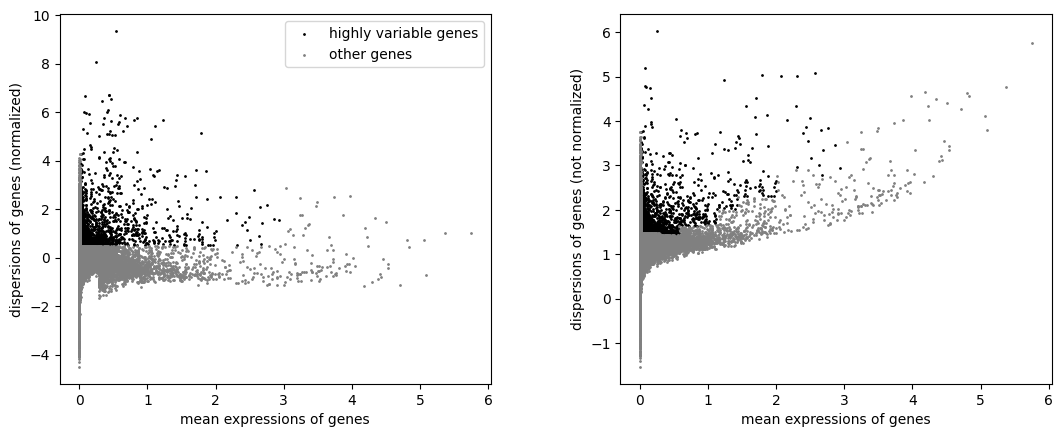

In [23]:
#plot out the number of highly variable genes
sc.pl.highly_variable_genes(data_DC2)

### regress out factors and perform scaling

In [24]:
# Actually do the filtering for PCA
data_DC2 = data_DC2[
    :, data_DC2.var.highly_variable
].copy()  # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself
data_DC2

AnnData object with n_obs × n_vars = 17391 × 1976
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
#Regress out total counts, %mt, cycling genes (30sec)
sc.pp.regress_out(data_DC2, ["total_counts", "pct_counts_mt", 'S_score', 'G2M_score'])
sc.pp.scale(data_DC2, max_value=10)

In [26]:
data_DC2

AnnData object with n_obs × n_vars = 17391 × 1976
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg

### Perform PCA:

In [27]:
## perform PCA, adjust number of PCs to calculate from default (50) to 60. (1mins)
sc.tl.pca(data_DC2, n_comps=60)

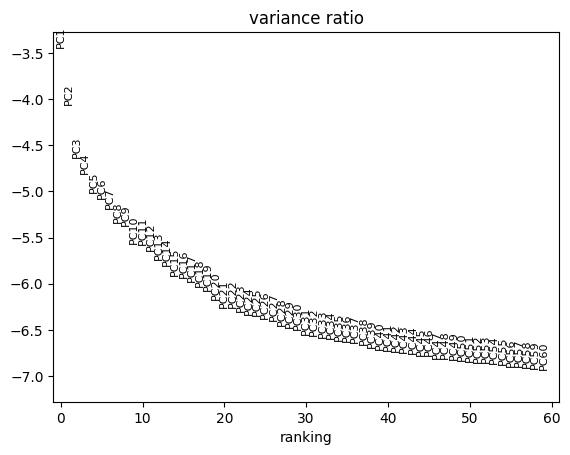

In [28]:
# make elbow plot to see variance contribution by each pc, choose inflection point
sc.pl.pca_variance_ratio(data_DC2, log=True, n_pcs=60)

### Integration (17min): 

In [29]:
sce.pp.harmony_integrate(data_DC2, 'integration_id', max_iter_harmony=200, verbose=True)

2025-05-29 17:24:56,712 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-29 17:25:00,433 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-29 17:25:00,557 - harmonypy - INFO - Iteration 1 of 200
2025-05-29 17:26:01,293 - harmonypy - INFO - Iteration 2 of 200
2025-05-29 17:27:03,144 - harmonypy - INFO - Iteration 3 of 200
2025-05-29 17:28:02,267 - harmonypy - INFO - Iteration 4 of 200
2025-05-29 17:28:59,528 - harmonypy - INFO - Iteration 5 of 200
2025-05-29 17:29:57,747 - harmonypy - INFO - Iteration 6 of 200
2025-05-29 17:30:54,157 - harmonypy - INFO - Iteration 7 of 200
2025-05-29 17:31:49,910 - harmonypy - INFO - Iteration 8 of 200
2025-05-29 17:32:45,814 - harmonypy - INFO - Iteration 9 of 200
2025-05-29 17:33:45,798 - harmonypy - INFO - Iteration 10 of 200
2025-05-29 17:34:41,308 - harmonypy - INFO - Iteration 11 of 200
2025-05-29 17:35:35,657 - harmonypy - INFO - Iteration 12 of 200
2025-05-29 17:36:30,629 - harmonypy - INFO - Ite

In [30]:
data_DC2.obsm

AxisArrays with keys: X_pca, X_pca_harmony

In [31]:
#check post int made new column with adjusted harmony PCs
'X_pca_harmony' in data_DC2.obsm

True

In [32]:
#assign the new PCs to the standard PCA slot for post int
data_DC2.obsm['X_pca'] = data_DC2.obsm['X_pca_harmony']

In [33]:
data_DC2.write_h5ad("20250529_NRclean_DC2-int.h5ad", compression="gzip")

### Neighbours:

In [34]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(data_DC2, n_neighbors=10, n_pcs=60)

### UMAP:

In [35]:
sc.tl.umap(data_DC2, min_dist=0.3)  # 0.3 is personal preference

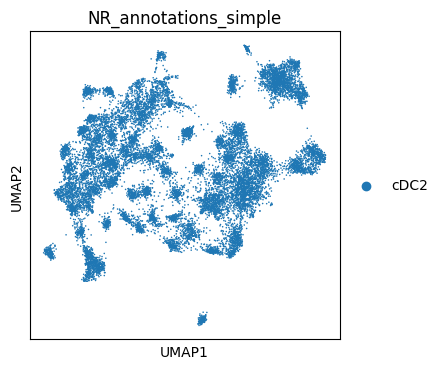

In [36]:
#plotting DC2 map
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC2, color=["NR_annotations_simple"], ncols=1, size=5)

In [49]:
#define DC subset gene sets from Guimaraes et al and Cheng et al
DC2_FCER1A = ['CD1C', 'FCER1A', 'CLEC10A']
DC2_AREG = ['AREG']
DC2_CD207 = ['CD207','CD1A'] #same as DC2_CD1A in Cheng et al
DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ']
DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']
DC_CXCL8 = ['CXCL2'] #CXCL8 removed as not in atlas 

DC2_CXCR4 = ['CXCR4']
DC2_IL1B = ['CD163','CD14','IL1B','TNF','CCL3','CCL4']
DC2_FCN1 = ['CD163', 'CD14', 'FCN1']
DC2_ISG15 = ['ISG15','IFIT1'] #IFIT6 removed as not in atlas
DC2_CXCL9 = ['CXCL9']

In [50]:
gene_sets_all = {
    "Guimaraes_DC2_FCER1A": DC2_FCER1A,
    "Guimaraes_DC2_AREG": DC2_AREG,
    "Guimaraes_Cheng_DC2_CD207/CD1A": DC2_CD207,
    "Guimaraes_DC3_CD14": DC3_CD14,
    "Guimaraes_DC4_FCGR3A": DC4_FCGR3A,
    "Guimaraes_DC_CXCL8": DC_CXCL8,
    "Cheng_DC2_CXCR4": DC2_CXCR4,
    "Cheng_DC2_IL1B": DC2_IL1B,
    "Cheng_DC2_FCN1": DC2_FCN1,
    "Cheng_DC2_ISG15": DC2_ISG15,
    "Cheng_DC2_CXCL9": DC2_CXCL9
}

In [51]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets_all.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [40]:
colour_vars = ["Guimaraes_DC2_FCER1A","Guimaraes_DC2_AREG","Guimaraes_Cheng_DC2_CD207/CD1A","Guimaraes_DC3_CD14","Guimaraes_DC4_FCGR3A","Guimaraes_DC_CXCL8","Cheng_DC2_CXCR4","Cheng_DC2_IL1B","Cheng_DC2_FCN1","Cheng_DC2_ISG15","Cheng_DC2_CXCL9"]

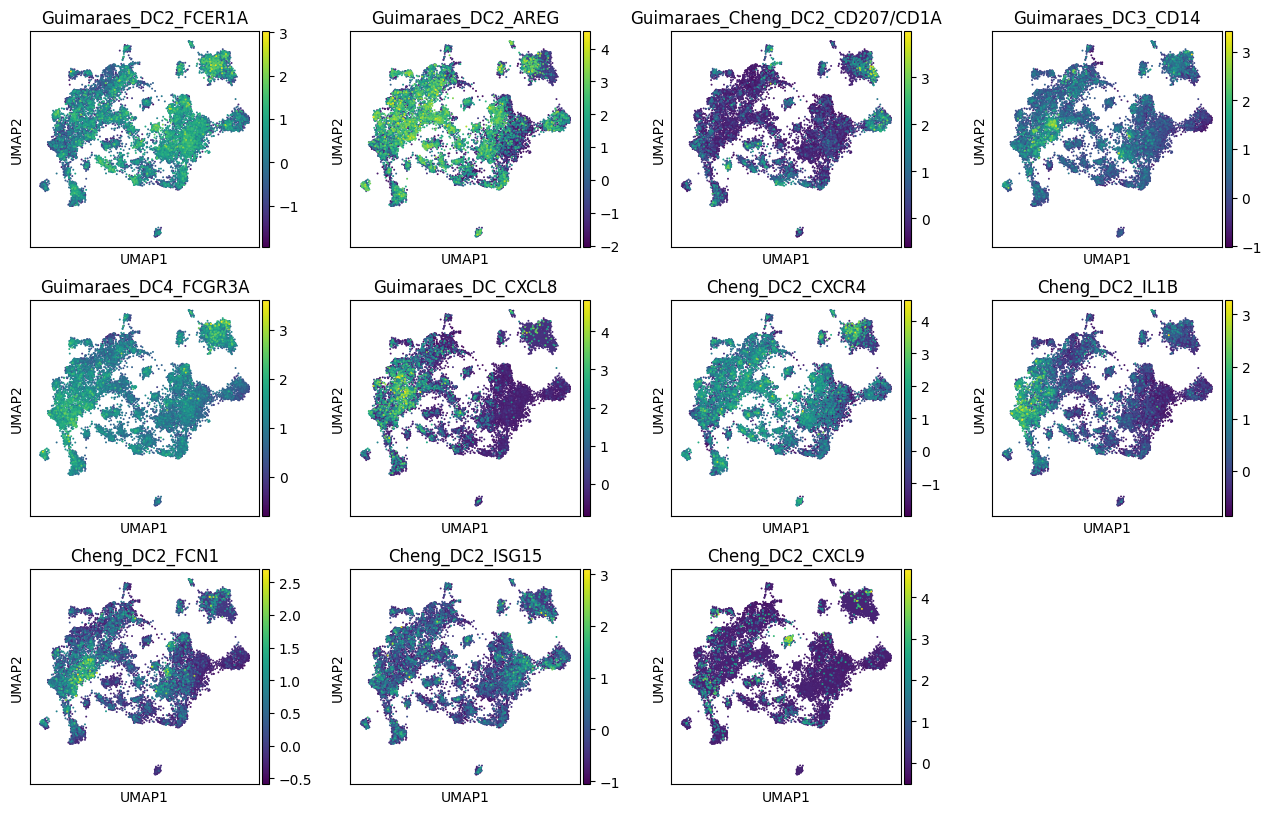

In [41]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=colour_vars, ncols=4, size=8)

## CLustering DC2:

In [42]:
# subcluster DC2 
sc.tl.leiden(data_DC2, resolution=0.2, key_added='2025-DC2-true_02')
sc.tl.leiden(data_DC2, resolution=0.5, key_added='2025-DC2-true_05')
sc.tl.leiden(data_DC2, resolution=0.8, key_added='2025-DC2-true_08')

/scratch/temp/14332124/ipykernel_3079504/2770926095.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.


In [43]:
colour_vars = ['2025-DC2-true_02', '2025-DC2-true_05', '2025-DC2-true_08']

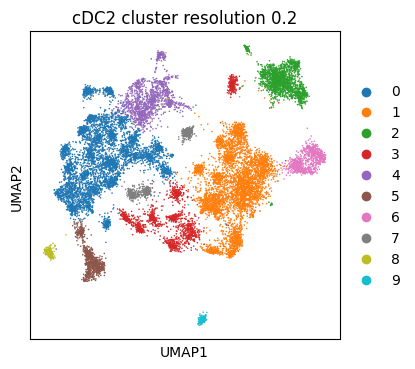

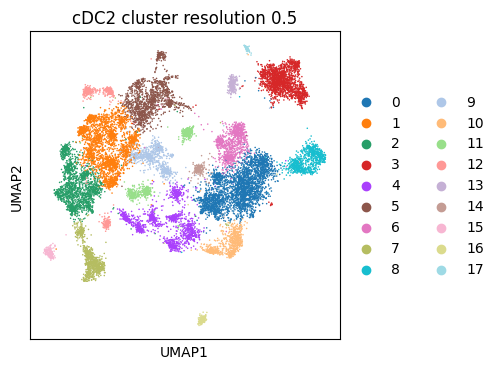

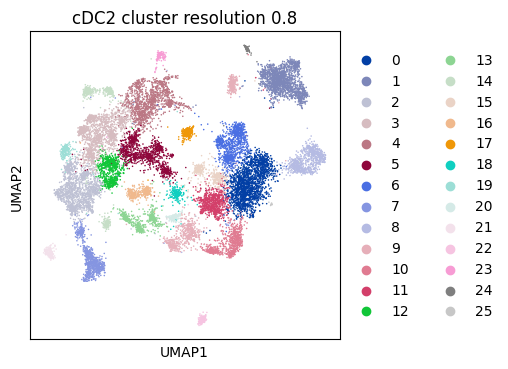

In [44]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC2, color=["2025-DC2-true_02"], ncols = 1, size=5, title="cDC2 cluster resolution 0.2")
    sc.pl.umap(data_DC2, color=["2025-DC2-true_05"], ncols = 1, size=5, title="cDC2 cluster resolution 0.5")
    sc.pl.umap(data_DC2, color=["2025-DC2-true_08"], ncols = 1, size=5, title="cDC2 cluster resolution 0.8")

In [47]:
#output the number of cells in each cluster
data_DC2.obs["2025-DC2-true_05"].value_counts()

2025-DC2-true_05
0     2903
1     2379
2     1659
3     1650
4     1420
5     1394
6      964
7      836
8      833
9      713
10     696
11     636
12     499
13     208
14     180
15     167
16     159
17      95
Name: count, dtype: int64

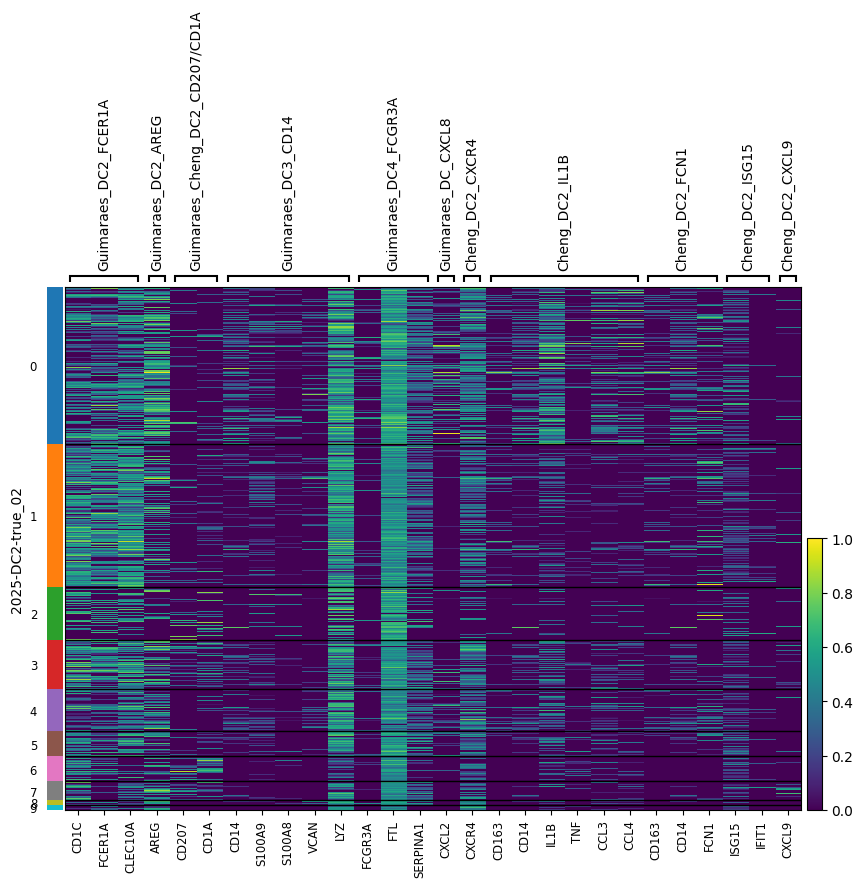

In [63]:
sc.pl.heatmap(data_DC2, gene_sets_all, groupby="2025-DC2-true_02", standard_scale="var", figsize=(10,7))

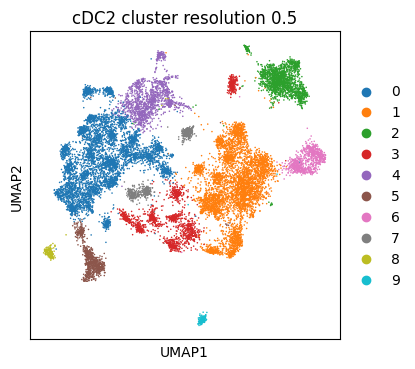

In [62]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DC2, color=["2025-DC2-true_02"], ncols = 1, size=5, title="cDC2 cluster resolution 0.5")

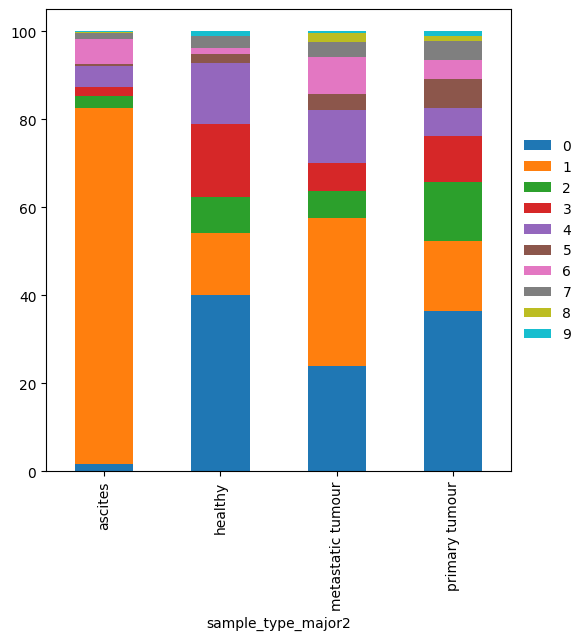

In [60]:
pd.crosstab(data_DC2.obs["sample_type_major2"], data_DC2.obs["2025-DC2-true_02"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

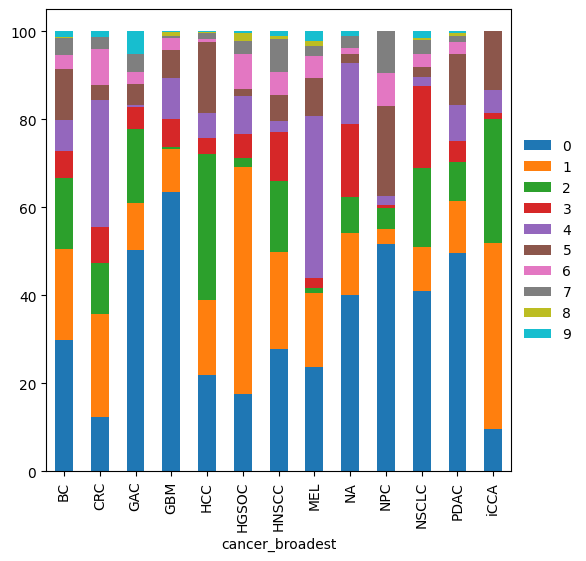

In [61]:
pd.crosstab(data_DC2.obs["cancer_broadest"], data_DC2.obs["2025-DC2-true_02"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

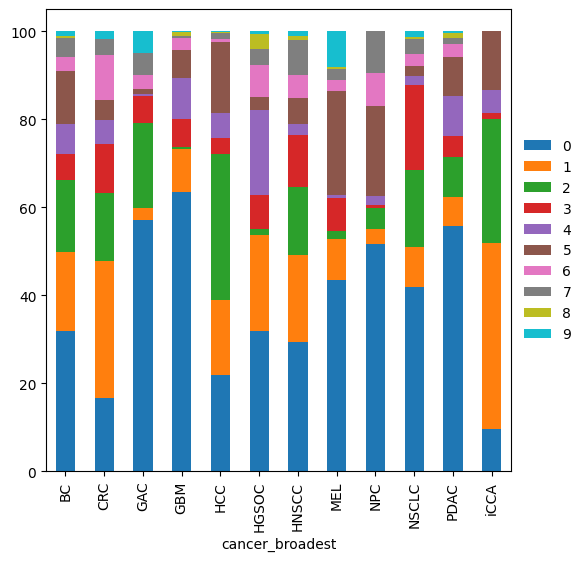

In [64]:
# subset to just primary
data_DC2_P = data_DC2[data_DC2.obs["sample_type_major2"] == "primary tumour"]

pd.crosstab(data_DC2_P.obs["cancer_broadest"], data_DC2_P.obs["2025-DC2-true_02"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(6,6))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)
plt.show()

### Checking Villani DC3 sig

In [65]:
DC3_sig = ['S100A9','S100A8','VCAN','LYZ','ANXA1','PLBD1','RNASE2','FCER1A','SLC2A3','CD163','CSF3R','MNDA','CD14','NAIP','CSTA','FCN1','CD1D','FPR1','F13A1','CLEC10A','CES1','PID1','S100A12','MTMR11','SMA','LAT2','RETN','TMEM173','AOAH','RAB3D','CD36','MGST1','TREM1','HNMT','CES1P1','ADAM15','IL13RA1','MICAL2','ITGA5','CREB5','IL1B','NR4A2','MPP7','PTAFR','HBEGF','NFE2','ASGR1','BST1','IL1RN','NOD2','NLRP3','DQ575504','LMNA','C9ORF89','IL27RA','NLRP12','RAB27A','EREG','LOC284454']

In [66]:
# Define dictionary of gene sets
gene_sets = {
    "DC3_sig": DC3_sig
}

In [67]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [68]:
colour_vars = ["DC3_sig"]

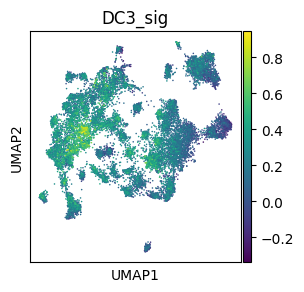

In [70]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=colour_vars, ncols=3, size=5)

# Below: plotting done on original object (now superceded above)

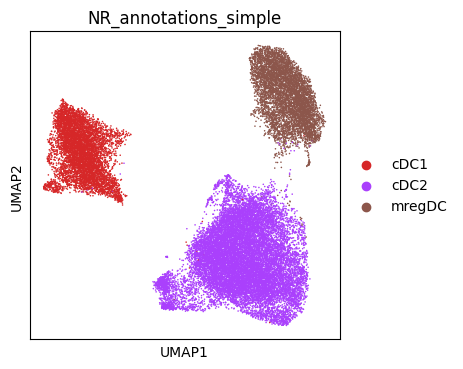

In [34]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols=1, size=5)

### Guimaraes DC2 clusters:
* DC2_FCER1A: CD1C, FCER1A, CLEC10A 
* DC2_AREG: AREG
* DC2_CCD207: CD207, CD1A
* DC3_CD14: CD14, S100A9, S100A8, VCAN, LYZ
* DC4_FCGR3A: FCGR3A, FTL, SERPINA1
* DC_CXCL8: CXCL8, CXCL2

In [ ]:
#define DC subset gene sets from Guimaraes et al
DC2_FCER1A = ['CD1C', 'FCER1A', 'CLEC10A']
DC2_AREG = ['AREG']
DC2_CD207 = ['CD207','CD1A']
DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ']
DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']
DC_CXCL8 = ['CXCL8','CXCL2']

In [71]:
# Define dictionary of gene sets
gene_sets_G = {
    "DC2_FCER1A_sig": DC2_FCER1A,
    "DC2_AREG_sig": DC2_AREG,
    "DC2_CD207_sig": DC2_CD207,
    "DC3_CD14_sig": DC3_CD14,
    "DC4_FCGR3A_sig": DC4_FCGR3A,
    "DC_CXCL8_sig": DC_CXCL8
}

In [72]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets_G.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [73]:
colour_vars = ["DC2_FCER1A_sig","DC2_AREG_sig","DC2_CD207_sig","DC3_CD14_sig","DC4_FCGR3A_sig","DC_CXCL8_sig","NR_annotations_simple"]

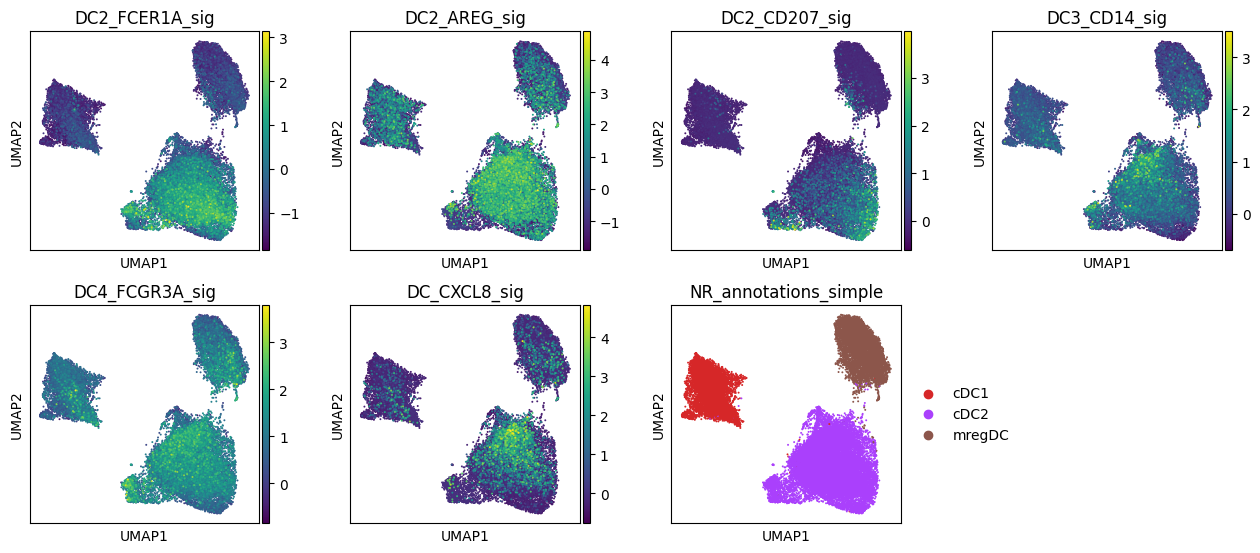

In [74]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=8)

### ^ Note no CXCL8, so DC_CXCL8 sig is just CXCL2 expression

### Cheng DC2 clusters:
* DC2_CXCR4 --> CXCR4
* DC2_CD1A --> CD1A, CD207
* DC2_IL1B --> CD163, CD14, IL1B, TNF, CCL3, CCL4
* DC2_FCN1 --> CD163, CD14, FCN1
* DC2_ISG15 --> ISG15, IFIT6, IFIT1
* DC2_CXCL9 --> CXCL9

In [ ]:
#define DC subset gene sets from Cheng et al
DC2_CXCR4 = ['CXCR4']
DC2_CD1A = ['CD1A','CD207']
DC2_IL1B = ['CD163','CD14','IL1B','TNF','CCL3','CCL4']
DC2_FCN1 = ['CD163', 'CD14', 'FCN1']
DC2_ISG15 = ['ISG15', 'IFIT6', 'IFIT1']
DC2_CXCL9 = ['CXCL9']

In [76]:
# Define dictionary of gene sets
gene_sets_C = {
    "DC2_CXCR4_sig": DC2_CXCR4,
    "DC2_CD1A_sig": DC2_CD1A,
    "DC2_IL1B_sig": DC2_IL1B,
    "DC2_FCN1_sig": DC2_FCN1,
    "DC2_ISG15_sig": DC2_ISG15,
    "DC2_CXCL9_sig": DC2_CXCL9
}

In [77]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets_C.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [78]:
colour_vars = ["DC2_CXCR4_sig","DC2_CD1A_sig","DC2_IL1B_sig","DC2_FCN1_sig","DC2_ISG15_sig","DC2_CXCL9_sig","NR_annotations_simple"]

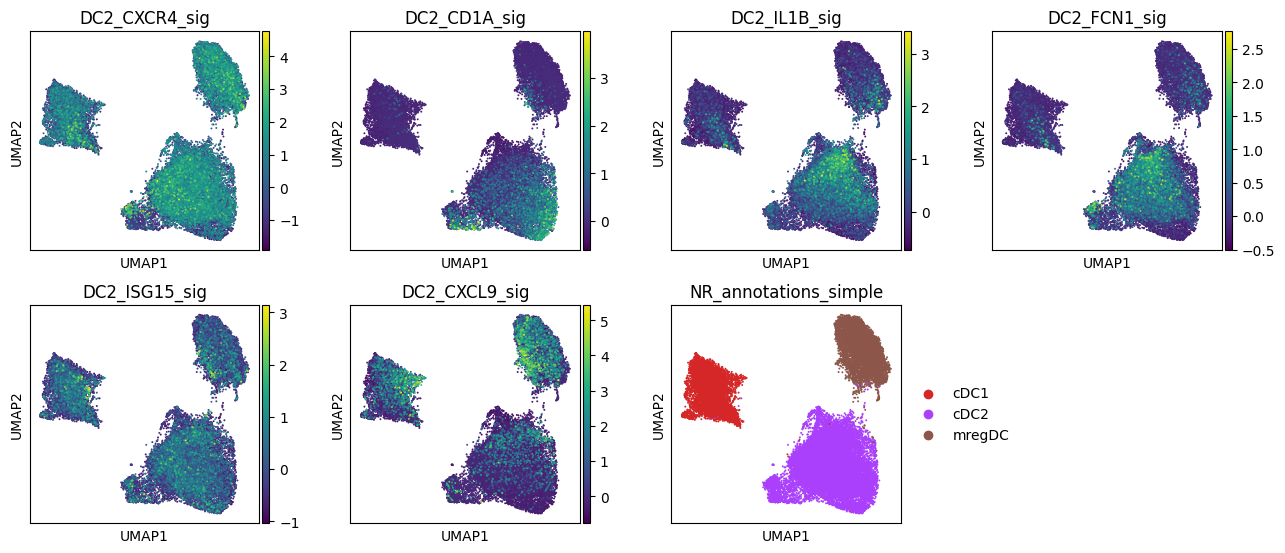

In [79]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=8)

### Subclustering DC2 and then seeing if any of the published signatures fall all within one cluster:

In [35]:
# subcluster DC2 
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.2, key_added='2025-DC2-subcluster_02')
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.5, key_added='2025-DC2-subcluster_05')
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=0.8, key_added='2025-DC2-subcluster_08')
sc.tl.leiden(data, restrict_to=('NR_annotations_simple', ['cDC2']), resolution=1, key_added='2025-DC2-subcluster_10')

In [38]:
colour_vars = ['2025-DC2-subcluster_02', '2025-DC2-subcluster_05', '2025-DC2-subcluster_08']

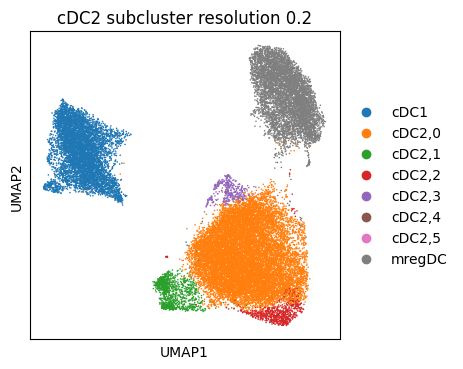

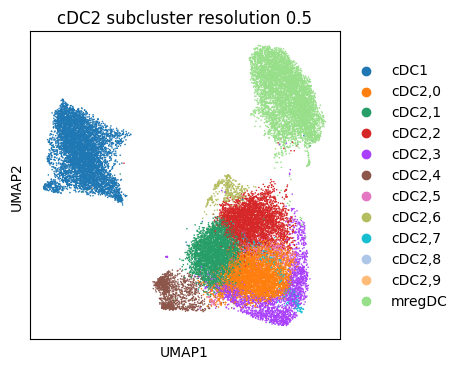

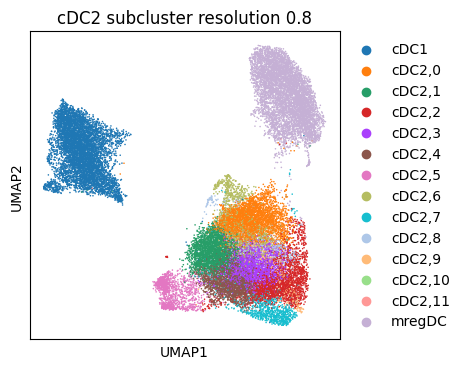

In [107]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["2025-DC2-subcluster_02"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.2")
    sc.pl.umap(data, color=["2025-DC2-subcluster_05"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.5")
    sc.pl.umap(data, color=["2025-DC2-subcluster_08"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.8")

In [141]:
#output the number of cells in each cluster
data.obs["2025-DC2-subcluster_02"].value_counts()

2025-DC2-subcluster_02
cDC2,0    15057
cDC1       6730
mregDC     6120
cDC2,1     1174
cDC2,2      757
cDC2,3      401
cDC2,4        1
cDC2,5        1
Name: count, dtype: int64

In [142]:
data.obs["2025-DC2-subcluster_05"].value_counts()

2025-DC2-subcluster_05
cDC1      6730
mregDC    6120
cDC2,0    4900
cDC2,1    3921
cDC2,2    3913
cDC2,3    2259
cDC2,4    1232
cDC2,5     492
cDC2,6     408
cDC2,7     264
cDC2,8       1
cDC2,9       1
Name: count, dtype: int64

In [143]:
data.obs["2025-DC2-subcluster_08"].value_counts()

2025-DC2-subcluster_08
cDC1       6730
mregDC     6120
cDC2,0     3330
cDC2,1     2703
cDC2,2     2431
cDC2,3     2406
cDC2,4     2275
cDC2,5     1211
cDC2,6     1190
cDC2,7      942
cDC2,8      619
cDC2,9      282
cDC2,10       1
cDC2,11       1
Name: count, dtype: int64

## Make graph --> how much does each gene signature fall within one cluster:

In [119]:
#re-define DC subset gene sets from Guimaraes et al and Cheng et al
DC2_FCER1A = ['CD1C', 'FCER1A', 'CLEC10A']
DC2_AREG = ['AREG']
DC2_CD207 = ['CD207','CD1A'] #same as DC2_CD1A in Cheng et al
DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ']
DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']
DC_CXCL8 = ['CXCL2'] #CXCL8 removed as not in atlas

DC2_CXCR4 = ['CXCR4']
DC2_IL1B = ['CD163','CD14','IL1B','TNF','CCL3','CCL4']
DC2_FCN1 = ['CD163', 'CD14', 'FCN1']
DC2_ISG15 = ['ISG15', 'IFIT1'] #IFIT6 removed as not in atlas
DC2_CXCL9 = ['CXCL9']

In [120]:
gene_sets_all = {
    "Guimaraes_DC2_FCER1A": DC2_FCER1A,
    "Guimaraes_DC2_AREG": DC2_AREG,
    "Guimaraes_Cheng_DC2_CD207/CD1A": DC2_CD207,
    "Guimaraes_DC3_CD14": DC3_CD14,
    "Guimaraes_DC4_FCGR3A": DC4_FCGR3A,
    "Guimaraes_DC_CXCL8": DC_CXCL8,
    "Cheng_DC2_CXCR4": DC2_CXCR4,
    "Cheng_DC2_IL1B": DC2_IL1B,
    "Cheng_DC2_FCN1": DC2_FCN1,
    "Cheng_DC2_ISG15": DC2_ISG15,
    "Cheng_DC2_CXCL9": DC2_CXCL9
}

In [144]:
#exclude cluster 10 and 11 from plot as only 1 cell allocated to each
data_sub = data[~data.obs['2025-DC2-subcluster_08'].isin(['cDC2,10', 'cDC2,11'])]

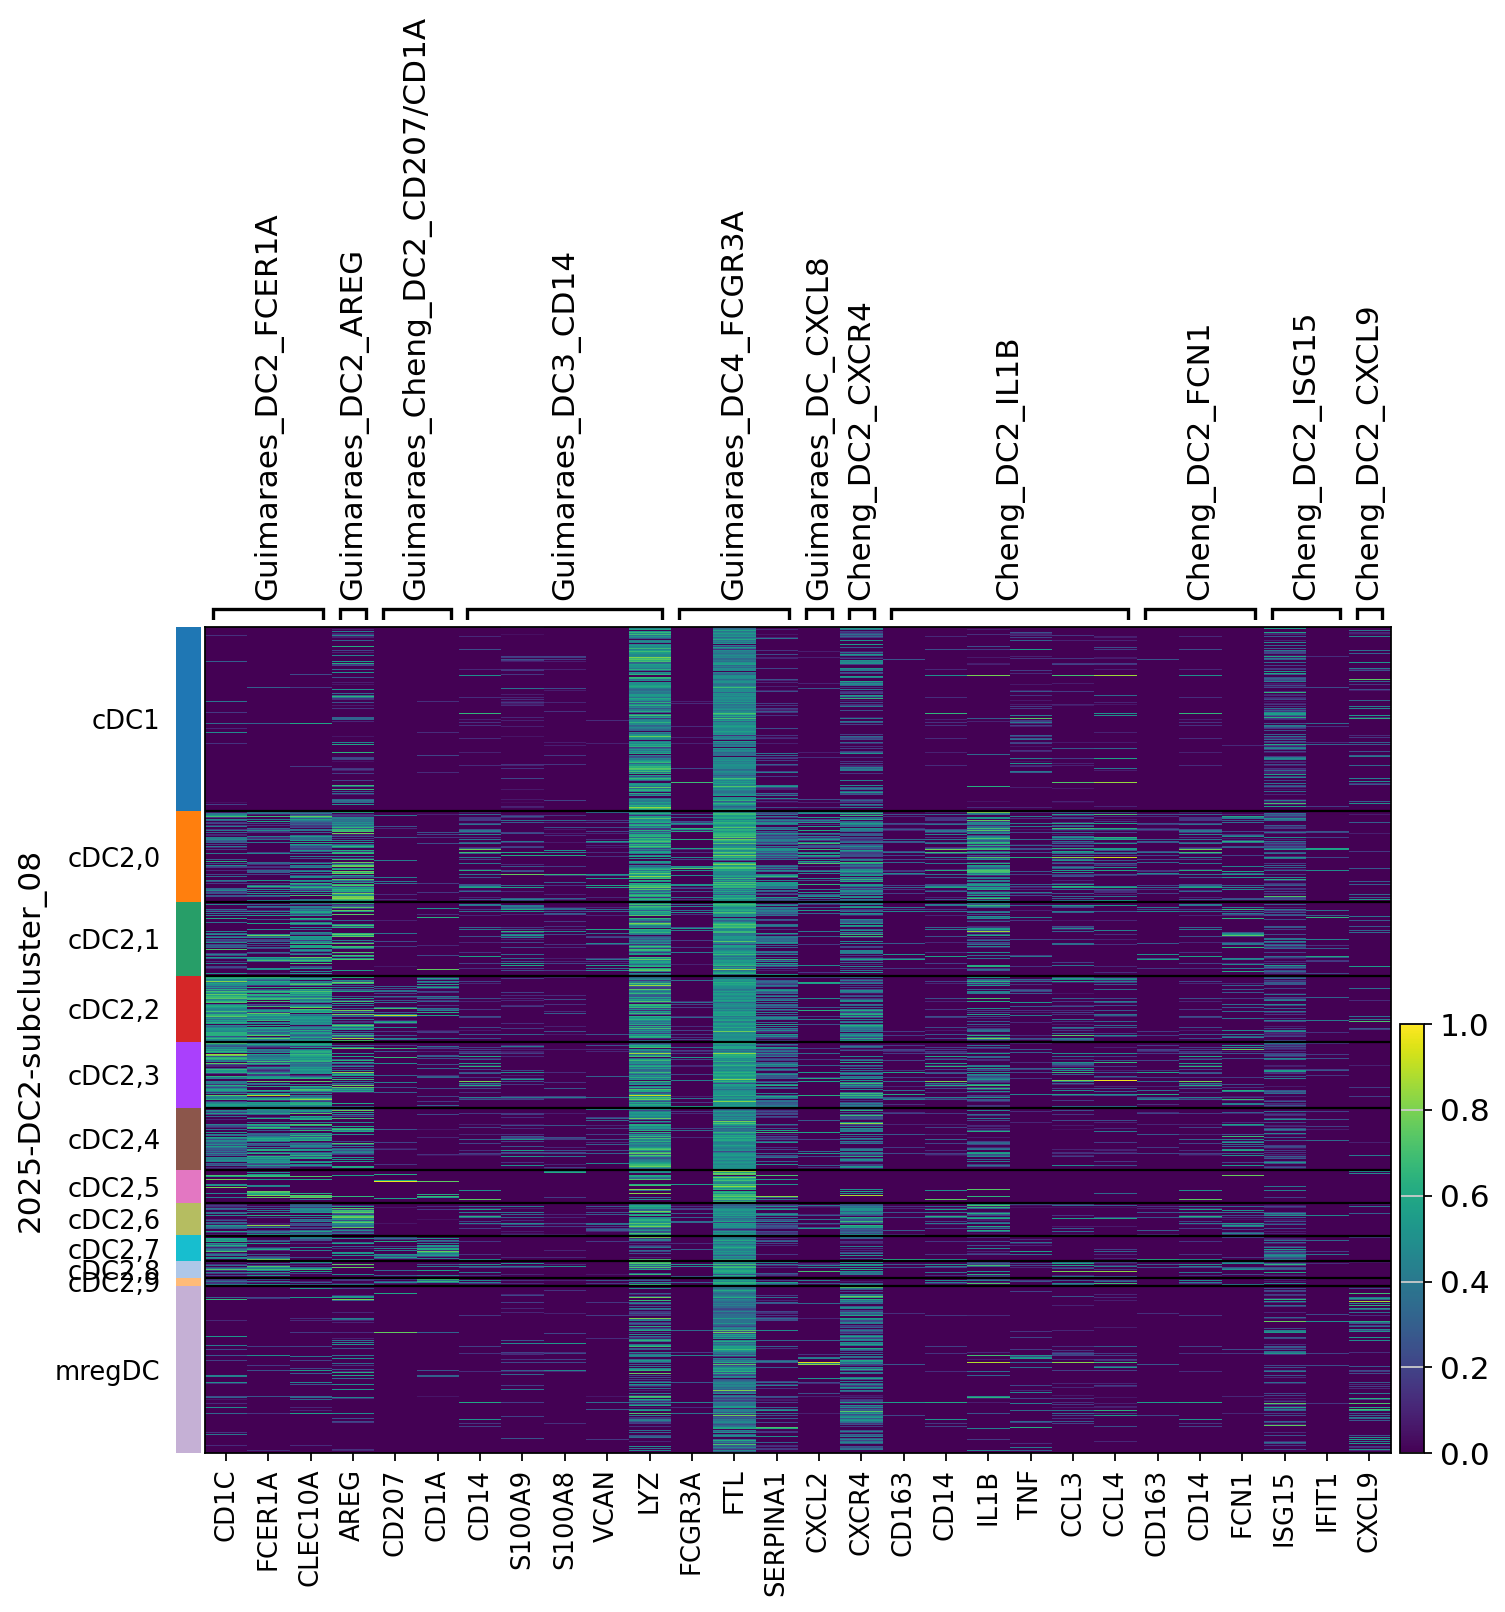

In [157]:
sc.pl.heatmap(data_sub, gene_sets_all, groupby="2025-DC2-subcluster_08", standard_scale="var", figsize=(10,7), save="_DC2_clusters.svg")

In [ ]:
sc.set_figure_params(dpi=80, dpi_save=700, vector_friendly=True, format='svg')

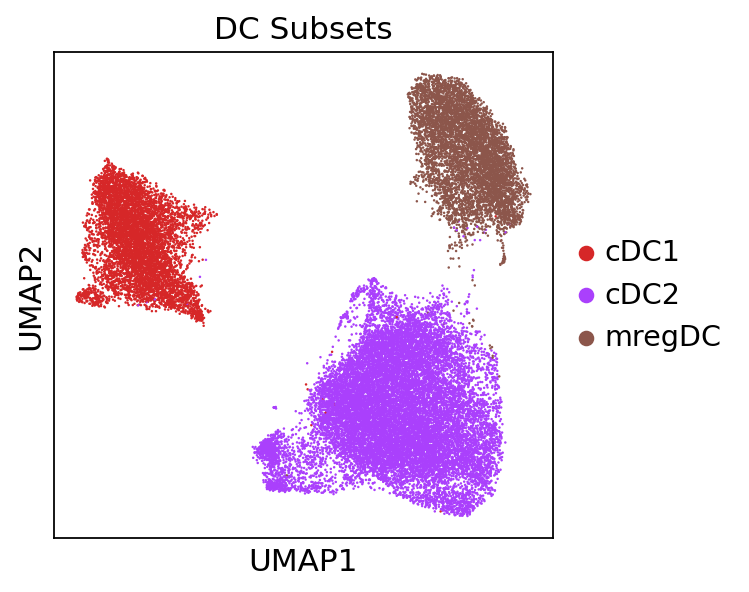

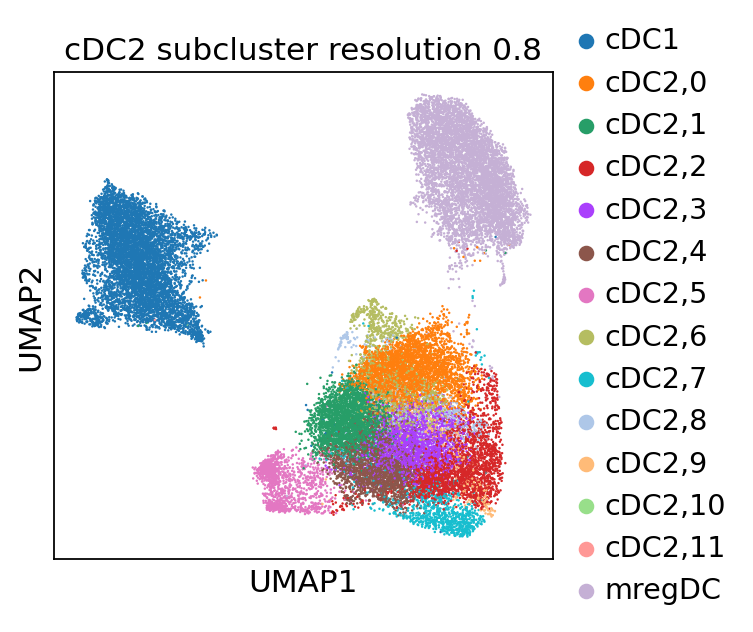

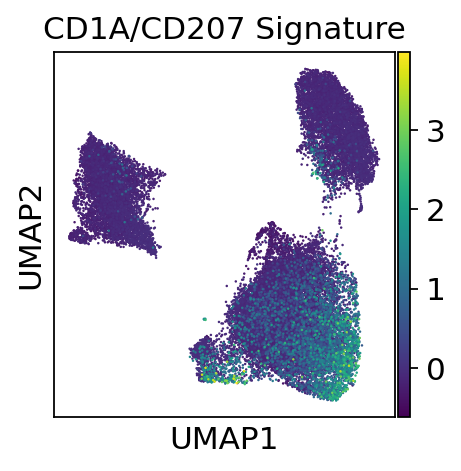

In [155]:
#plotting clusters
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols = 1, size=5, title="DC Subsets", save="_DC_UMAP.svg")
    sc.pl.umap(data, color=["2025-DC2-subcluster_08"], ncols = 1, size=5, title="cDC2 subcluster resolution 0.8", save="_DC2_sub_08.svg")
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=["DC2_CD1A_sig"], ncols = 1, size=5, title="CD1A/CD207 Signature", save="_DC2_CD1Asig.svg")